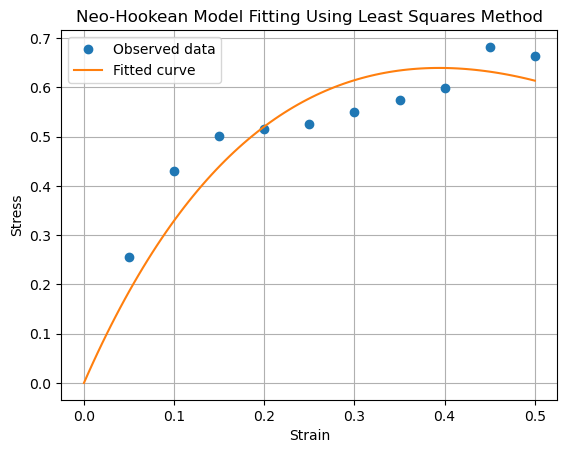

Optimized C1: 0.6964495462028516
Optimized D1: -1.4635299808009787


In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# prepare data
strain = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
stress_observed = np.array([0.254823, 0.430447, 0.501413, 0.514713, 0.526133, 0.550443, 0.574680, 0.598780, 0.681987, 0.662970])

# define Neo-Hookean model
def neo_hookean_stress(strain, C1, D1):
    stretch = 1 + strain
    J = stretch
    return 2 * C1 * (stretch - 1/stretch**2) + (2 * D1 / J) * (stretch**2 - 1 - 2 * np.log(stretch))

# 应用最小二乘法
initial_guess = [0.5, 0.5]  # 初始参数猜测
params_opt, params_cov = curve_fit(neo_hookean_stress, strain, stress_observed, p0=initial_guess)

# 计算拟合曲线
strain_fitted = np.linspace(0, 0.5, 100)  # 创建密集的应变点，用于绘制拟合曲线
stress_fitted = neo_hookean_stress(strain_fitted, *params_opt)

# 绘制图像
plt.plot(strain, stress_observed, 'o', label='Observed data')  # 绘制观测数据点
plt.plot(strain_fitted, stress_fitted, '-', label='Fitted curve')  # 绘制拟合曲线
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.title('Neo-Hookean Model Fitting Using Least Squares Method')
plt.grid()
plt.show()


# 输出结果
C1_opt, D1_opt = params_opt
print("Optimized C1:", C1_opt)
print("Optimized D1:", D1_opt)


这段代码首先导入了必要的库，然后准备了数据（应变和应力）。接着，我们定义了Neo-Hookean模型的函数neo_hookean_stress，该函数接受应变和模型参数作为输入，并返回预测的应力。我们使用curve_fit函数从scipy.optimize库中对模型参数进行最小二乘法拟合。最后，我们输出了优化后的参数值。

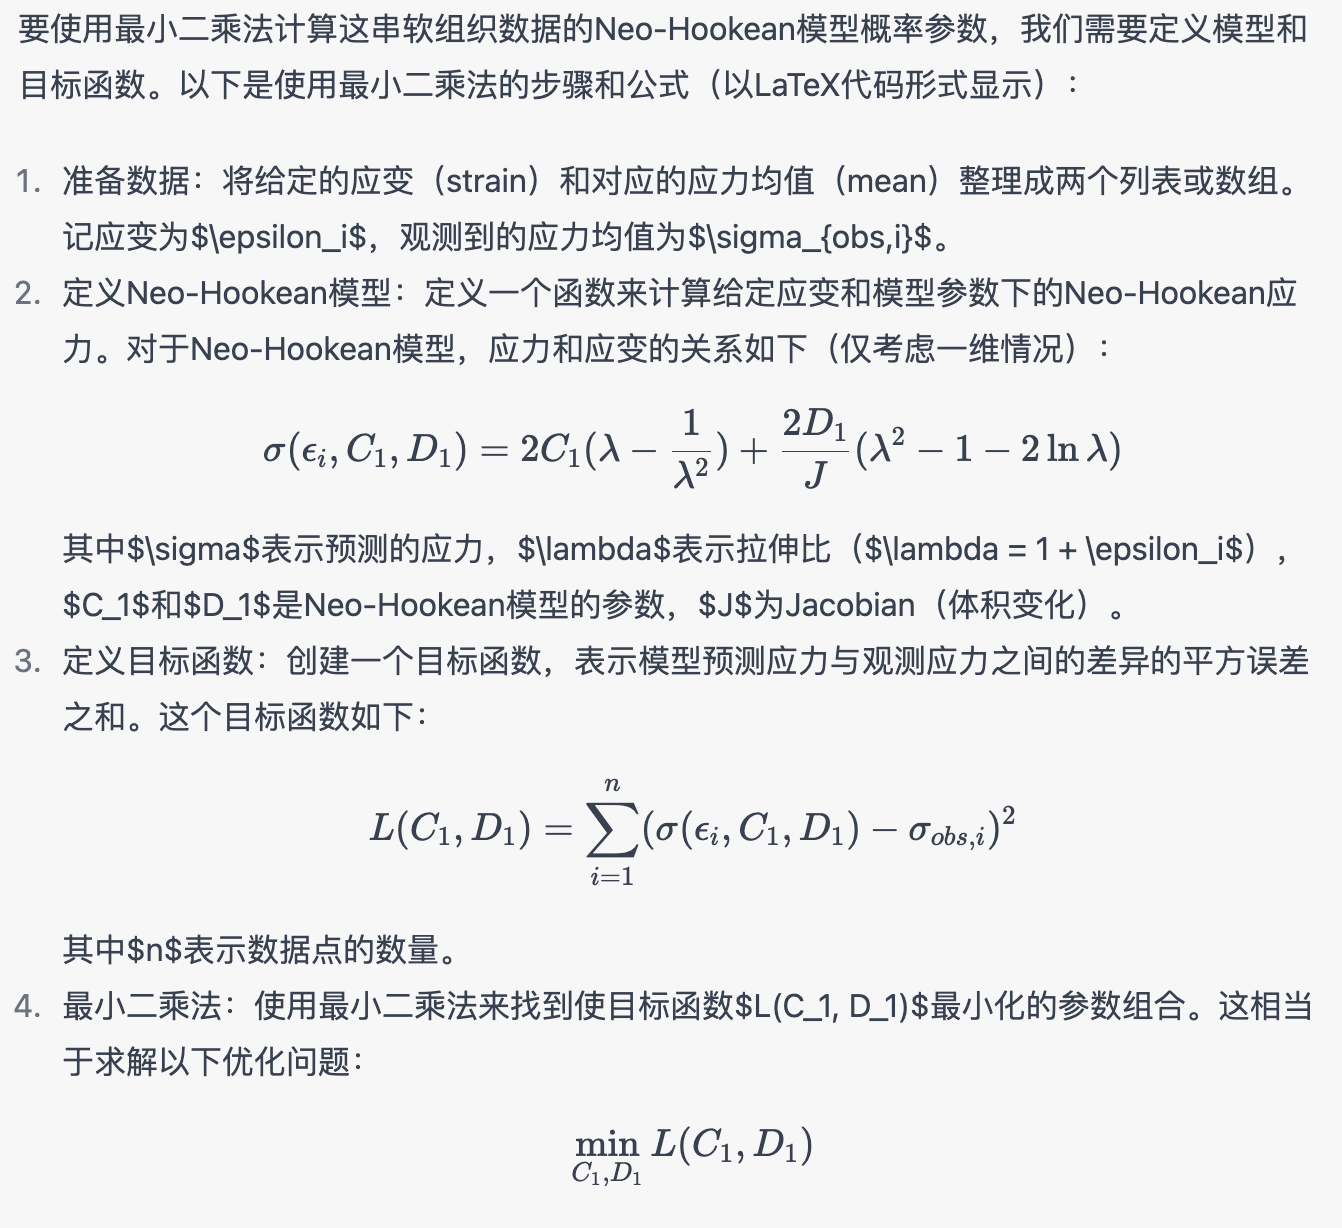

In [2]:
def convert_C1D1_to_mu_kappa(C1, D1):
    mu = 2 * C1
    kappa = 2 * D1 + (2 * mu) / 3
    return mu, kappa

# 计算mu和kappa
mu, kappa = convert_C1D1_to_mu_kappa(C1_opt, D1_opt)

print("Shear modulus mu:", mu)
print("Bulk modulus kappa:", kappa)


Shear modulus mu: 1.3928990879592877
Bulk modulus kappa: -1.998460547820633
